# Projet ML Débutant : Prédiction de la progression du diabète

In [56]:
import numpy as np
import pandas as pd 
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt 
import seaborn as sns

### Etape 1 : Importation et préparation du dataset

In [57]:
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [58]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [59]:
# Les dimensions du DataFrame
df.shape

(442, 11)

In [60]:
# Informations importantes sur le dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [61]:
# Verification des valeurs manquantes
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [62]:
# Statistiques descriptives 
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


### Etape 2: Analyse exploratoire 

<Axes: xlabel='target', ylabel='Count'>

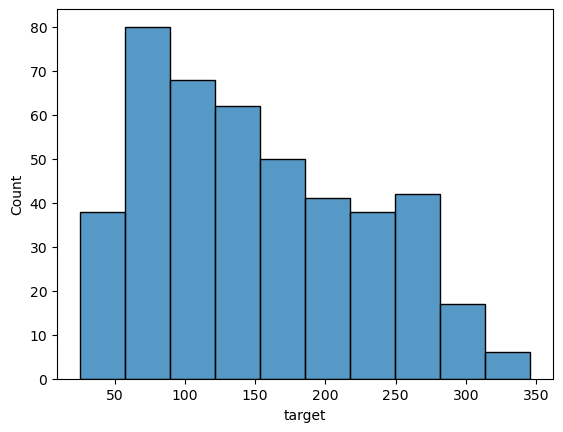

In [63]:
# Distribution de la variable cible 
target = df['target']
sns.histplot(target)

Text(0.5, 1.0, 'Age vs Target')

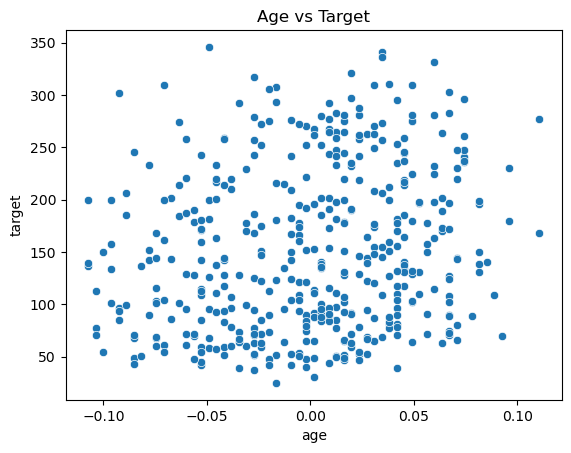

In [64]:
# Scatterplot entre chaque variable et la cible 
# 1. Age
sns.scatterplot(x = df['age'], y=target, data=df)
plt.title('Age vs Target')

Text(0.5, 1.0, 'Sex vs Target')

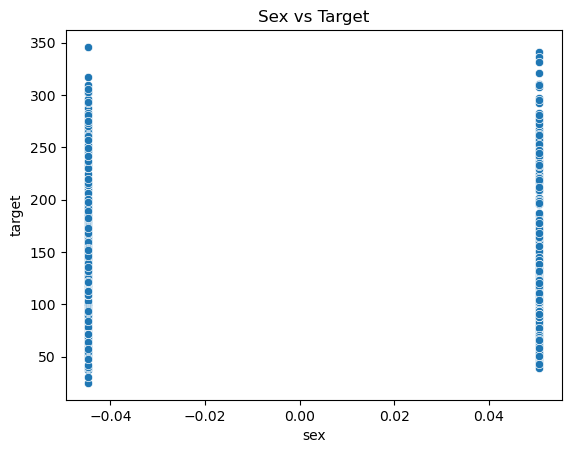

In [65]:
# Sex
sns.scatterplot(x = df['sex'], y=target, data=df)
plt.title('Sex vs Target')

Text(0.5, 1.0, 'BMI vs Target')

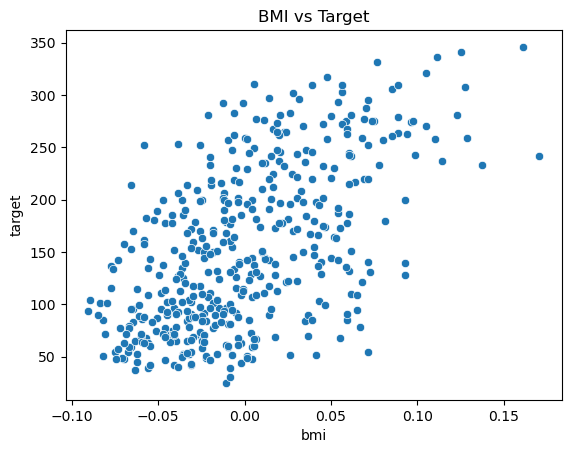

In [66]:
# BMI
sns.scatterplot(x = df['bmi'], y=target, data=df)
plt.title('BMI vs Target')

Text(0.5, 1.0, 'BP vs Target')

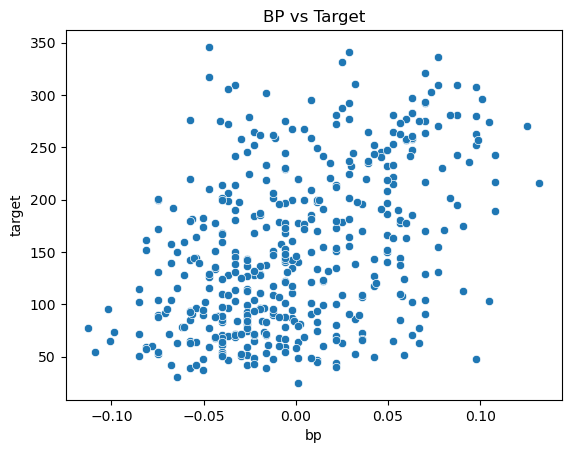

In [67]:
# BPI
sns.scatterplot(x = df['bp'], y=target, data=df)
plt.title('BP vs Target')

Text(0.5, 1.0, 'S1 vs Target')

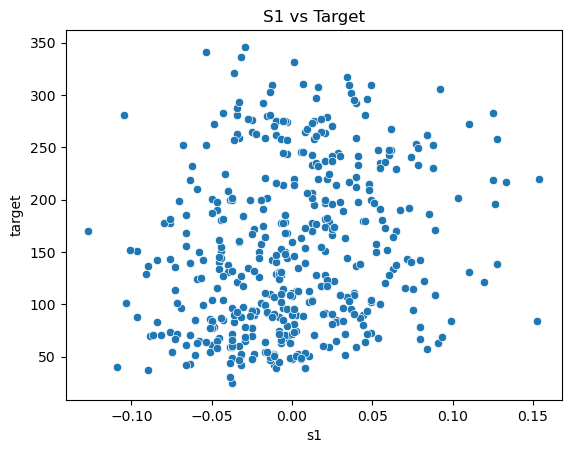

In [68]:
# S1
sns.scatterplot(x = df['s1'], y=target, data=df)
plt.title('S1 vs Target')

Text(0.5, 1.0, 'S2 vs Target')

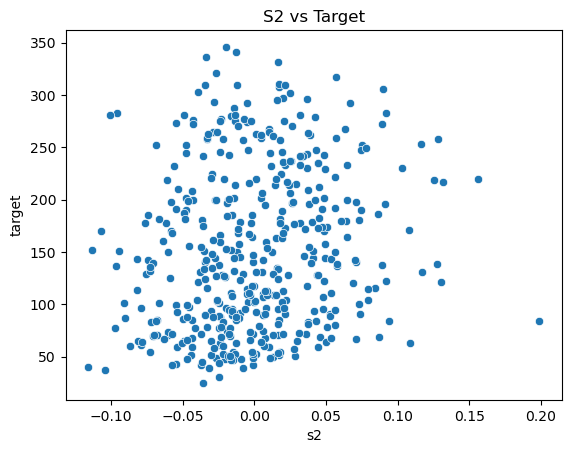

In [69]:
# S2
sns.scatterplot(x = df['s2'], y=target, data=df)
plt.title('S2 vs Target')

Text(0.5, 1.0, 'S3 vs Target')

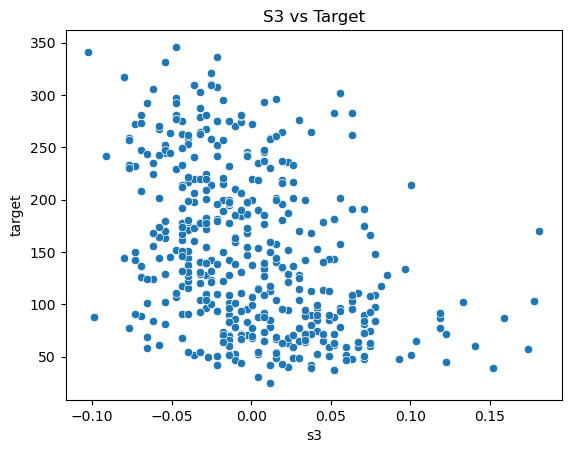

In [70]:
# S3
sns.scatterplot(x = df['s3'], y=target, data=df)
plt.title('S3 vs Target')

Text(0.5, 1.0, 'S4 vs Target')

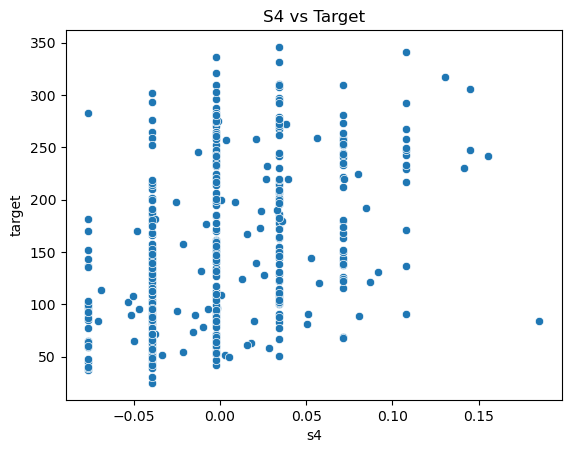

In [71]:
# S4
sns.scatterplot(x = df['s4'], y=target, data=df)
plt.title('S4 vs Target')

Text(0.5, 1.0, 'S5 vs Target')

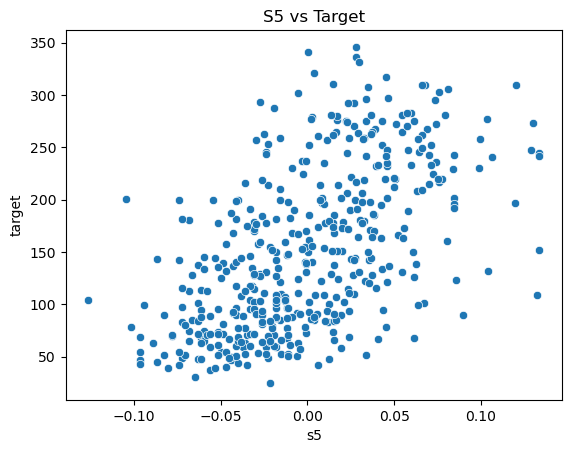

In [72]:
# S5
sns.scatterplot(x = df['s5'], y=target, data=df)
plt.title('S5 vs Target')

Text(0.5, 1.0, 'S6 vs Target')

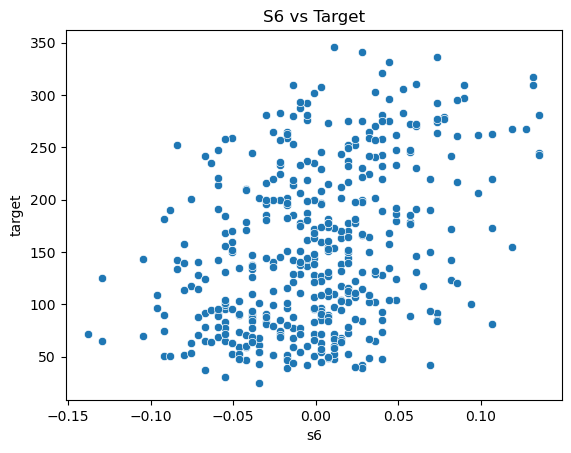

In [73]:
# S6
sns.scatterplot(x = df['s6'], y=target, data=df)
plt.title('S6 vs Target')

<Axes: >

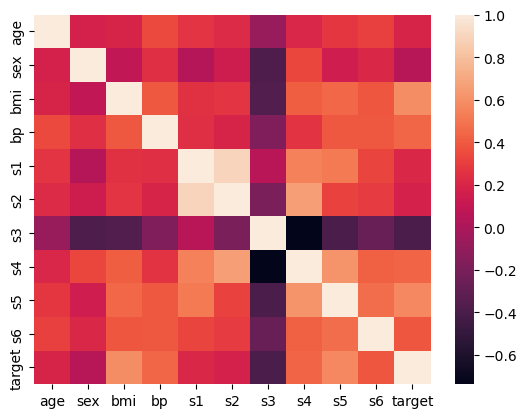

In [74]:
# Corrélations entre les features et la target 
df_corr = df.corr()
sns.heatmap(df_corr)

Les variables les plus corrélés avec la progression du diabète sont : 
- bmi
- s5

### Etape 3 : Séparation des données 

In [77]:
from sklearn.model_selection import train_test_split
x = df.drop(['target'], axis=1)
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Etape 4: Régression linéaire

In [78]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
# Entrainer le modèle 
lin_model.fit(x_train, y_train)

LinearRegression()

#### Evalutaion des métriques de performances

In [79]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# 1. Sur les données d'entraînement 
train_prediction = lin_model.predict(x_train)
lin_train_R_2 =round(r2_score(y_train, train_prediction), 2)
lin_train_MSE = round((mean_squared_error(y_train, train_prediction)), 2)
lin_train_RMSE = round(np.sqrt(lin_train_MSE), 2)
lin_train_MAE = round(mean_absolute_error(y_train, train_prediction),2)
print(f"R2 = {lin_train_R_2}")
print(f"MSE = {lin_train_MSE}")
print(f"RMSE = {lin_train_RMSE}")
print(f"MAE = {lin_train_MAE}")

R2 = 0.55
MSE = 2650.48
RMSE = 51.48
MAE = 41.44


In [80]:
#2. Sur les données de test 
test_prediction = lin_model.predict(x_test)
lin_test_R_2 = round(r2_score(y_test, test_prediction),2)
lin_test_MSE = round(mean_squared_error(y_test, test_prediction),2)
lin_test_RMSE= round(np.sqrt(lin_test_MSE))
lin_test_MAE = round(mean_absolute_error(y_test, test_prediction), 2)
print(f"R2 = {lin_test_R_2}")
print(f"MSE = {lin_test_MSE}")
print(f"RMSE = {lin_test_RMSE}")
print(f"MAE = {lin_test_MAE}")

R2 = 0.4
MSE = 3780.38
RMSE = 61
MAE = 50.93


In [81]:
# Prédictions sur x_test
lin_model.predict(x_test)

array([186.29111212,  97.88315298, 128.58435832,  48.89357583,
       122.64102482, 259.96671544,  48.16060705, 156.13572023,
       207.88062384, 169.40750988, 241.97022999, 186.9680969 ,
       196.08299152, 169.43712322, 232.01196156, 197.71587056,
        64.4644229 , 170.86749079, 245.07614658, 119.39711702,
       150.00566518, 133.63062753, 252.03253896, 160.22915291,
       111.14788082,  51.6400471 ,  69.84466982, 206.58793714,
        70.17817598, 196.30559263, 148.02144107, 132.09214457,
       147.05625779, 156.4420826 , 119.33607304, 144.39937893,
       184.72430535,  64.99106188, 107.5683759 , 181.8022131 ,
        98.97972114, 228.32192817, 197.64175677, 176.21509261,
       265.65151566, 150.91936487, 167.49958026, 222.20483981,
       163.24623621, 129.37381254,  71.39301455, 240.64698126,
       135.76557484, 168.17593615, 186.70641993,  85.53950747,
       295.81330046, 143.22677076, 131.06846395, 115.96049969,
        63.04946377, 143.94162855, 117.14811028, 236.18

### Visualisation de la relation entre les variables prédites et les valeurs réelles

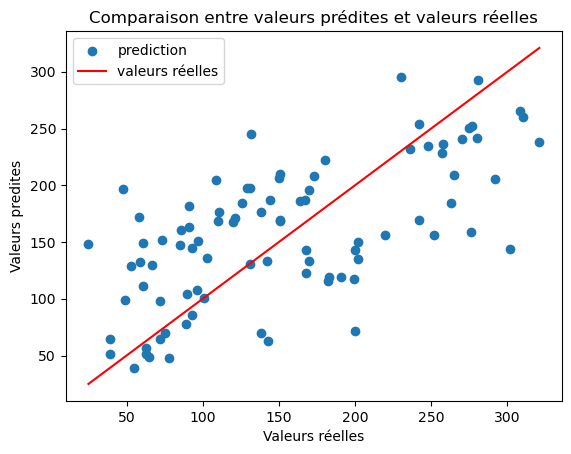

In [82]:
plt.scatter(y_test, test_prediction, label='prediction')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='red', label='valeurs réelles')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs predites')
plt.title('Comparaison entre valeurs prédites et valeurs réelles')
plt.legend()
plt.show()

### Etape 5 : Regression polynomiale 

In [83]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
poly_features = PolynomialFeatures(degree=2)   # Pour cet exercice
poly_reg = LinearRegression()
pol_model = Pipeline([
    ('poly_features', poly_features),
    ('lin_reg', poly_reg)
])

In [84]:
pol_model.fit(x_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('lin_reg', LinearRegression())])

In [85]:
# Observation de ses performances
# 1. Sur les données d'entrainements
pol_prediction = pol_model.predict(x_train)
pol_train_R_2 = round(r2_score(y_train, pol_prediction), 2)
pol_train_MSE = round((mean_squared_error(y_train, pol_prediction)), 2)
pol_train_RMSE = round(np.sqrt(pol_train_MSE), 2)
pol_train_MAE = round(mean_absolute_error(y_train, pol_prediction),2)
print(f"R2 = {pol_train_R_2}")
print(f"MSE = {pol_train_MSE}")
print(f"RMSE = {pol_train_RMSE}")
print(f"MAE = {pol_train_MAE}")

R2 = 0.63
MSE = 2159.19
RMSE = 46.47
MAE = 36.12


In [86]:
# 2. Sur les données de test
pol_prediction = pol_model.predict(x_test)
pol_test_R_2 = round(r2_score(y_test, pol_prediction),2)
pol_test_MSE = round((mean_squared_error(y_test, pol_prediction)), 2)
pol_test_RMSE = round(np.sqrt(pol_test_MSE), 2)
pol_test_MAE = round(mean_absolute_error(y_test, pol_prediction),2)
print(f"R2 = {pol_test_R_2}")
print(f"MSE = {pol_test_MSE}")
print(f"RMSE = {pol_test_RMSE}")
print(f"MAE = {pol_test_MAE}")

R2 = 0.35
MSE = 4100.65
RMSE = 64.04
MAE = 53.08


### Modèle Lineaire vs modèle polynomiale

In [87]:
# Sur les données d'entrainements
print(f" Comparaison des métriques de performances des deux modèles ")
print(f" lin_train_RMSE = {lin_train_RMSE} et pol_train _RMSE = {pol_train_RMSE}")
print(f" lin_train_MSE = {lin_train_MSE} et pol_train_MSE = {pol_train_MSE}")
print(f" lin_train_MAE = {lin_train_MAE} et pol_train_MAE = {pol_train_MAE}")
print(f" lin_train_R2 = {lin_train_R_2} et pol_train_ R2 = {pol_train_R_2}")


 Comparaison des métriques de performances des deux modèles 
 lin_train_RMSE = 51.48 et pol_train _RMSE = 46.47
 lin_train_MSE = 2650.48 et pol_train_MSE = 2159.19
 lin_train_MAE = 41.44 et pol_train_MAE = 36.12
 lin_train_R2 = 0.55 et pol_train_ R2 = 0.63


In [88]:
# Sur les données de tests
print(f" Comparaison des métriques de performances des deux modèles ")
print(f" lin_test_RMSE = {lin_test_RMSE} et pol_test _RMSE = {pol_test_RMSE}")
print(f" lin_test_MSE = {lin_test_MSE} et pol_test_MSE = {pol_test_MSE}")
print(f" lin_test_MAE = {lin_test_MAE} et pol_test_MAE = {pol_test_MAE}")
print(f" lin_test_R2 = {lin_test_R_2} et pol_test_ R2 = {pol_test_R_2}")

 Comparaison des métriques de performances des deux modèles 
 lin_test_RMSE = 61 et pol_test _RMSE = 64.04
 lin_test_MSE = 3780.38 et pol_test_MSE = 4100.65
 lin_test_MAE = 50.93 et pol_test_MAE = 53.08
 lin_test_R2 = 0.4 et pol_test_ R2 = 0.35


###  Etape 6: Cross-Validation

In [89]:
# On importe la fonction "cross_val_score" de sklearn
from sklearn.model_selection import cross_val_score

- **Sur le modèle linéaire**

In [90]:
# 1. Données d'entrainement
train_score = cross_val_score(lin_model, x_train, y_train, cv=5)
print(train_score)

[0.60257852 0.50391586 0.49502378 0.41657973 0.58946171]


In [91]:
# Calcul de la moyenne des scores 
train_score.mean()

np.float64(0.5215119195053708)

In [92]:
# 2. Données de test
test_score = cross_val_score(lin_model, x_test, y_test, cv=5)
print(test_score)

[ 0.73545355 -0.69193954  0.37931594  0.01880232  0.40979427]


In [93]:
# Calcul de la moyenne des scores
test_score.mean()

np.float64(0.17028530788526114)

- **Sur le modèle polynomiale**

In [94]:
# 1. Données d'entraînements
train_score_2 = cross_val_score(pol_model, x_train, y_train, cv=5)
print(train_score_2)

[0.54688846 0.44808549 0.39691328 0.17533522 0.3052576 ]


In [95]:
# Calcul de la moyenne des scores 
train_score_2.mean()

np.float64(0.37449600873713573)

In [96]:
# 2. Données de tests
test_score_2 = cross_val_score(pol_model, x_test, y_test, cv=5)
print(test_score_2)

[-153.648838    -16.56853612   -5.47762335  -30.73084801   -4.02982603]


In [97]:
# Calcul de la moynne des scores 
test_score_2.mean()

np.float64(-42.091134302524225)

### Etape 7 : Visualisation

**y_test vs y_pred**

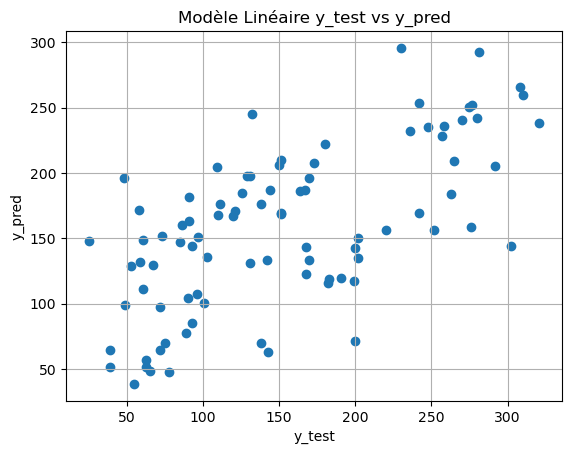

In [106]:
# 1. Modèle linéaire
y_pred = test_prediction
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('Modèle Linéaire y_test vs y_pred')
plt.grid(True)
plt.show()

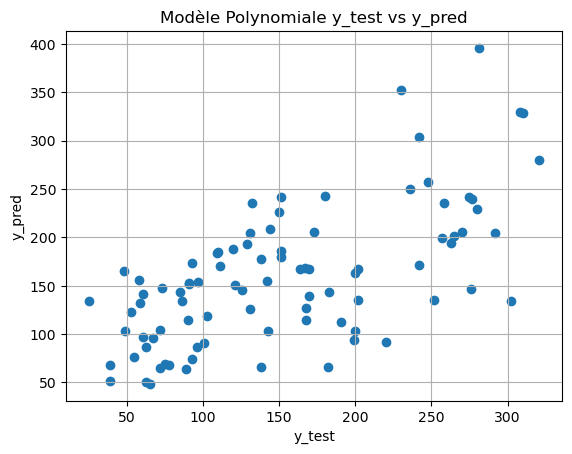

In [107]:
# Modèle polynomiale 
y_pred_2 = pol_prediction
plt.scatter(y_test, y_pred_2)
plt.title('Modèle Polynomiale y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.grid(True)
plt.show()

**Distribution des erreurs de prédictions** 

Text(0.5, 1.0, 'Erreurs de prédiction modèle Linéaire')

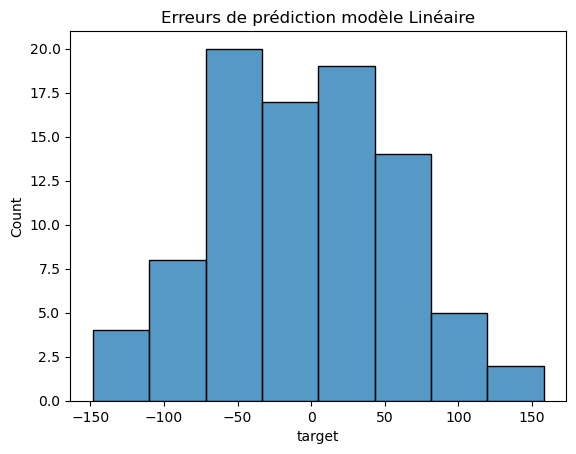

In [111]:
# 1. Modèle linéaire 
error = y_test - y_pred
sns.histplot(error)
plt.title('Erreurs de prédiction modèle Linéaire')

Text(0.5, 1.0, 'Erreurs de prédiction modèle polynomiale')

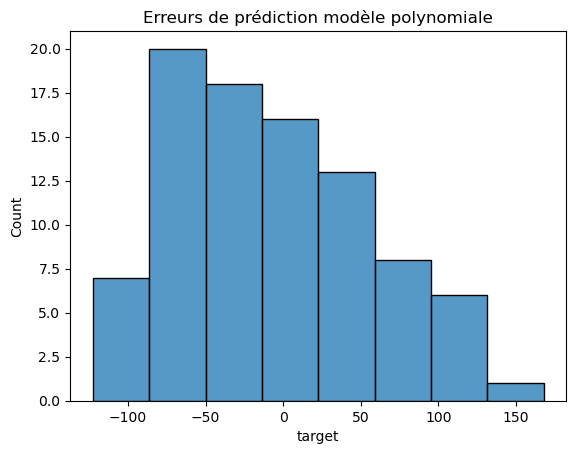

In [112]:
# 2. Modèle polynomiale 
error_2 = y_test - y_pred_2
sns.histplot(error_2)
plt.title('Erreurs de prédiction modèle polynomiale')

###  Etape 8 : Interprétation des coéfficients 

In [115]:
# Coéfficients du modèle linéaire
lin_model.coef_

array([   14.43232662,  -264.3620487 ,   487.0056998 ,   356.19783047,
       -1181.61870935,   730.14698362,   248.17748849,   292.46080291,
         886.33722325,    70.17034873])

In [117]:
df.head(1)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.05068,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0


les valeurs les plus influentent sur la progression du diabète sont : 
- s2
- s5